# THỰC HÀNH NHẬP MÔN TRÍ TUỆ NHÂN TẠO

# Reinforcement Learning – đường đi Mê cung & dạng 6x6

### Bài 1: 

In [1]:
maze_size = 6
obstacles = [(0,1), (1,1), (4,1), (4,2), (3,2), (4,3),(3,3),(3,4),(0,4), (3,5)]
start = (0,0)
goal = (0,5)

def is_valid(x,y):
    return (0 <= x < maze_size) and (0 <= y < maze_size) and (x,y) not in obstacles
def dfs (current, visited, path):
    x,y = current
    if current == goal:
        path.append(current)
        return True
    visited.add(current)
    moves = [(x-1, y), (x+1, y), (x,y-1), (x, y+1)]
    for move in moves:
        if is_valid(*move) and move not in visited:
            if dfs(move, visited, path):
                path.append(current)
                return True
    return False
visited = set()
path=[]
if dfs(start, visited, path):
    path.reverse()
    print("Path found")
    for position in path:
        print(position)
else:
    print("No path found!")
        

Path found
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(3, 1)
(2, 1)
(2, 2)
(1, 2)
(0, 2)
(0, 3)
(1, 3)
(2, 3)
(2, 4)
(1, 4)
(1, 5)
(0, 5)


### Bài 2:

In [2]:
maze_size = 6
obstacles = [(0,1), (2,2), (3,2), (4,2), (5,2), (0,3),(2,4),(5,4)]
start = (0,0)
goal = (0,5)

def is_valid(x,y):
    return (0 <= x < maze_size) and (0 <= y < maze_size) and (x,y) not in obstacles
def dfs (current, visited, path):
    x,y = current
    if current == goal:
        path.append(current)
        return True
    visited.add(current)
    moves = [(x-1, y), (x+1, y), (x,y-1), (x, y+1)]
    for move in moves:
        if is_valid(*move) and move not in visited:
            if dfs(move, visited, path):
                path.append(current)
                return True
    return False
visited = set()
path=[]
if dfs(start, visited, path):
    path.reverse()
    print("Path found")
    for position in path:
        print(position)
else:
    print("No path found!")


Path found
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(5, 1)
(4, 1)
(3, 1)
(2, 1)
(1, 1)
(1, 2)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(4, 4)
(3, 4)
(3, 5)
(2, 5)
(1, 5)
(0, 5)


### Bài 3: 

Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]


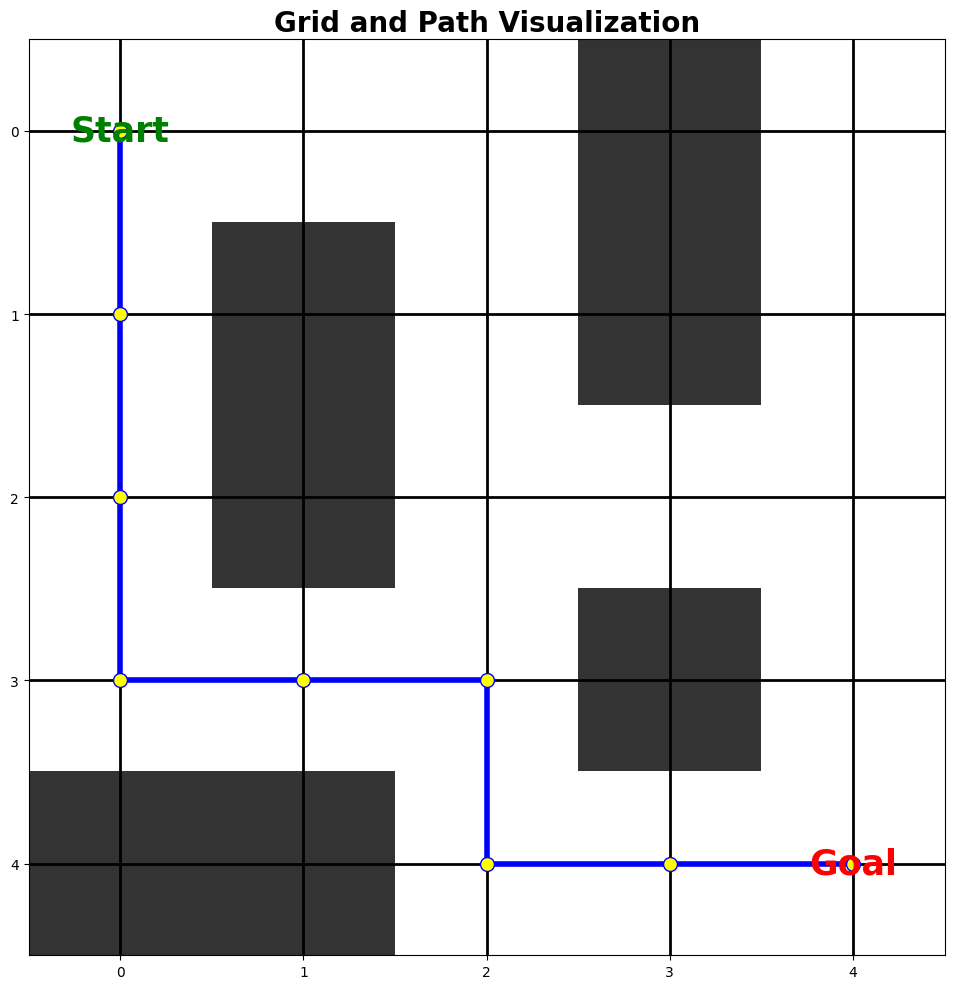

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque 

# Hướng di chuyển: lên, xuống, trái, phải
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

class FSSP_BFS:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start 
        self.goal = goal 
        self.rows = len(grid)
        self.cols = len(grid[0])

    # Kiểm tra vị trí có nằm trong lưới và không phải chướng ngại vật
    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0

    # Tìm kiếm theo chiều rộng (BFS)
    def bfs(self):
        queue = deque([(self.start, [self.start])])
        visited = set([self.start])

        while queue:
            current, path = queue.popleft()
            if current == self.goal:
                return path

            # Khám phá tất cả hướng đi
            for move in MOVES:
                next_r, next_c = current[0] + move[0], current[1] + move[1]
                next_position = (next_r, next_c)

                if self.is_valid(next_position) and next_position not in visited:
                    visited.add(next_position)
                    queue.append((next_position, path + [next_position]))
        
        # Không tìm thấy đường đi
        return None

    # Trực quan hóa lưới và đường đi
    def visualize(self, path):
        grid_np = np.array(self.grid)
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(grid_np, cmap='Greys', alpha=0.8)

        # Đánh dấu điểm bắt đầu và kết thúc
        ax.text(self.start[1], self.start[0], 'Start', color='green', fontsize=25,
                fontweight='bold', ha='center', va='center')
        ax.text(self.goal[1], self.goal[0], 'Goal', color='red', fontsize=25,
                fontweight='bold', ha='center', va='center')

        # Vẽ đường đi
        if path:
            path_np = np.array(path)
            ax.plot(path_np[:, 1], path_np[:, 0], color='blue', linewidth=4.0,
                    marker='o', markersize=10, markerfacecolor='yellow', label='Path')

        # Tạo lưới và gắn nhãn
        ax.set_xticks(np.arange(self.cols))
        ax.set_yticks(np.arange(self.rows))
        ax.set_xticklabels(np.arange(self.cols))
        ax.set_yticklabels(np.arange(self.rows))
        ax.grid(which='both', color='black', linewidth=2.0)

        # Tiêu đề và hiển thị
        plt.title("Grid and Path Visualization", fontsize=20, fontweight='bold')
        plt.tight_layout()
        plt.show()


# ====== CHẠY DEMO ======
grid = [
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

planner = FSSP_BFS(grid, start, goal)
path = planner.bfs()

if path:
    print(f"Path found: {path}")
    planner.visualize(path)
else:
    print("No path found")


### Bài 4: 

Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (5, 5)]


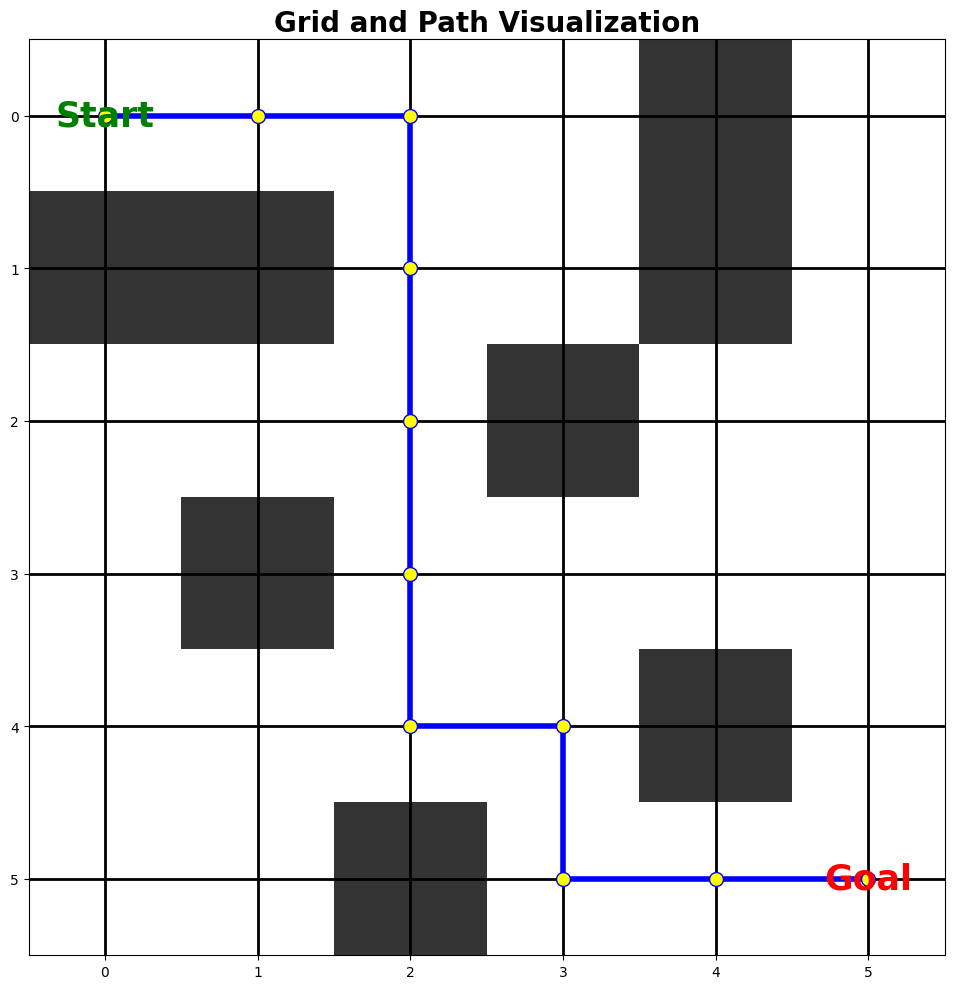

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Hướng di chuyển: lên, xuống, trái, phải
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

class FSSP_BFS:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.rows = len(grid)
        self.cols = len(grid[0])

    # Kiểm tra hợp lệ
    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0

    # Tìm kiếm BFS
    def bfs(self):
        queue = deque([(self.start, [self.start])])
        visited = set([self.start])
        while queue:
            current, path = queue.popleft()
            if current == self.goal:
                return path
            for move in MOVES:
                next_r, next_c = current[0] + move[0], current[1] + move[1]
                next_position = (next_r, next_c)
                if self.is_valid(next_position) and next_position not in visited:
                    visited.add(next_position)
                    queue.append((next_position, path + [next_position]))
        return None

    # Hiển thị trực quan
    def visualize(self, path):
        grid_np = np.array(self.grid)
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(grid_np, cmap='Greys', alpha=0.8)

        ax.text(self.start[1], self.start[0], 'Start', color='green',
                fontsize=25, fontweight='bold', ha='center', va='center')
        ax.text(self.goal[1], self.goal[0], 'Goal', color='red',
                fontsize=25, fontweight='bold', ha='center', va='center')

        if path:
            path_np = np.array(path)
            ax.plot(path_np[:, 1], path_np[:, 0], color='blue', linewidth=4,
                    marker='o', markersize=10, markerfacecolor='yellow', label='Path')

        ax.set_xticks(np.arange(self.cols))
        ax.set_yticks(np.arange(self.rows))
        ax.set_xticklabels(np.arange(self.cols))
        ax.set_yticklabels(np.arange(self.rows))
        ax.grid(which='both', color='black', linewidth=2.0)
        plt.title("Grid and Path Visualization", fontsize=20, fontweight='bold')
        plt.tight_layout()
        plt.show()

# ===================== CHẠY DEMO =====================
# Dạng lưới (0 = ô trống, 1 = chướng ngại vật)
grid = [
    [0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0]
]

# Vị trí điểm bắt đầu và điểm đích
start = (0, 0)
goal = (5, 5)  # Sửa cú pháp thiếu dấu '='

# Hàm FSSP_BFS - tìm kiếm theo chiều rộng
planner = FSSP_BFS(grid, start, goal)
path = planner.bfs()

# Kết quả
if path:
    print(f"Path found: {path}")
    planner.visualize(path)
else:
    print("No path found")



### Bài 5: 

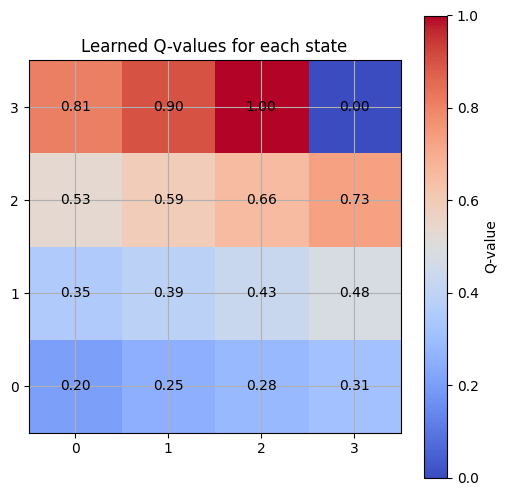

Learned Q-table:
[[0.07009859 0.20336089 0.06827686 0.        ]
 [0.09142493 0.10005291 0.05585928 0.2534705 ]
 [0.12449063 0.11685003 0.28242347 0.12666067]
 [0.1435069  0.23642052 0.31381045 0.23962239]
 [0.34867844 0.26404818 0.18126585 0.20540188]
 [0.31074664 0.30738641 0.38742049 0.30924169]
 [0.43046721 0.37847198 0.37408211 0.33017755]
 [0.43505166 0.39418039 0.4782969  0.42029035]
 [0.531441   0.49938069 0.48877219 0.45148385]
 [0.52451999 0.56559413 0.59049    0.56999701]
 [0.63249232 0.63921417 0.61318524 0.6561    ]
 [0.7051502  0.729      0.71493058 0.71281465]
 [0.80568904 0.80085665 0.76464049 0.81      ]
 [0.89714748 0.89302256 0.8935459  0.9       ]
 [1.         0.99484622 0.99127204 0.99127204]
 [0.         0.         0.         0.        ]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt   # các siêu tham số

n_states = 16
n_actions = 4
goal_state = 15

Q_table = np.zeros((n_states, n_actions))

alpha = 0.1                      # hệ số alpha
gamma = 0.9                      # hệ số gamma
exploration_prob = 0.2           # xác suất khám phá
epochs = 1000                    # số tập
# quy trình của Q_learning
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)

    while current_state != goal_state:

        # khám phá so với khai thác (ε-chính sách tham lam)
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])

        # chuyển sang trạng thái tiếp theo
        next_state = (current_state + 1) % n_states

        # phần thưởng 1 nếu đạt được goal_state, 0 nếu không đạt
        reward = 1 if next_state == goal_state else 0

        # cập nhật giá trị Q
        Q_table[current_state, action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state                # cập nhật trạng thái hiện tại

# trực quan bảng Q dạng lưới
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

# biểu đồ dạng lưới các giá trị Q
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()           # bố cục dạng lưới
plt.grid(True)

# các giá trị Q dạng lưới
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# xuất ra bảng Q đã học
print("Learned Q-table:")
print(Q_table)


### Bài 6:

In [9]:
import numpy as np
# định nghĩa môi trường
maze_size = 4
start = (0, 0)
goal = (3, 3)

# khởi tạo giá trị Q
Q_table = np.zeros((maze_size, maze_size, 4))

# siêu tham số
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# hàm cập nhật giá trị Q
def update_Q_table(pos, action, reward, next_pos):
    Q_table[pos[0], pos[1], action] = Q_table[pos[0], pos[1], action] + alpha * (reward + gamma * np.max(Q_table[next_pos[0], next_pos[1], :]) - Q_table[pos[0], pos[1], action])

# hàm chọn hành động
def choose_action(pos):
    if np.random.rand() < epsilon:
        return np.random.randint(0, 4)
    else:
        return np.argmax(Q_table[pos[0], pos[1], :])# huấn luyện Q-learning
# huấn luyện Q-learning
for episode in range(10000):
    pos = start
    while pos != goal:
        action = choose_action(pos)
        next_pos = pos
        if action == 0 and pos[0] > 0:             # lên
            next_pos = (pos[0] - 1, pos[1])
        elif action == 1 and pos[0] < maze_size - 1:  # xuống
            next_pos = (pos[0] + 1, pos[1])
        elif action == 2 and pos[1] > 0:             # trái
            next_pos = (pos[0], pos[1] - 1)
        elif action == 3 and pos[1] < maze_size - 1: # phải
            next_pos = (pos[0], pos[1] + 1)

        reward = 0
        if next_pos == goal:
            reward = 1
        elif next_pos == pos:
            reward = -1

        update_Q_table(pos, action, reward, next_pos)
        pos = next_pos

# xuất ra giá trị Q
print("Bảng giá trị Q")
print(Q_table)





Bảng giá trị Q
[[[-0.468559    0.59049    -0.468559    0.59049   ]
  [-0.51282383  0.6561      0.43296328  0.43777814]
  [-0.62415824  0.729       0.2766794   0.51212135]
  [-0.34186363  0.81        0.4012935  -0.45291357]]

 [[ 0.531441    0.531441   -0.40951     0.6561    ]
  [ 0.59049     0.59049     0.59049     0.729     ]
  [ 0.6561      0.6561      0.6561      0.81      ]
  [ 0.729       0.9         0.729      -0.19      ]]

 [[ 0.59049     0.07363066 -0.28927127  0.22263453]
  [ 0.6561      0.07012854  0.30261366  0.30706845]
  [ 0.729       0.44661762  0.3842367   0.69410887]
  [ 0.81        1.          0.6561     -0.1       ]]

 [[ 0.27651428 -0.15892121  0.          0.        ]
  [ 0.30803737 -0.09468819  0.          0.        ]
  [ 0.03643073 -0.091       0.01439889  0.81469798]
  [ 0.          0.          0.          0.        ]]]
